In [1423]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib as ta
plt.rcParams["figure.figsize"] = (20, 10)


In [1669]:
df=pd.read_csv('ind_nifty500list.csv')

In [1670]:
mask = ~df['Symbol'].str.endswith('.NS')

# Update the 'Symbol' column where the mask is True
df.loc[mask, 'Symbol'] = df.loc[mask, 'Symbol'] + '.NS'

In [1671]:
df
download_list=df['Symbol'].to_list()

In [1672]:
Stocks=yf.download(tickers=download_list,period='6y')['Close']

[*********************100%***********************]  515 of 515 completed


3 Failed downloads:
['PVR.NS', 'KALPATPOWR.NS', 'MAHINDCIE.NS']: Exception('%ticker%: No data found, symbol may be delisted')


In [1689]:
Stocks

,3MINDIA.NS,AARTIDRUGS.NS,AAVAS.NS,ABB.NS,ABBOTINDIA.NS,ABCAPITAL.NS,ABFRL.NS,ABSLAMC.NS,ACC.NS,ADANIENT.NS,...,WHIRLPOOL.NS,WIPRO.NS,WOCKPHARMA.NS,YESBANK.NS,ZEEL.NS,ZENSARTECH.NS,ZFCVINDIA.NS,ZOMATO.NS,ZYDUSLIFE.NS,ZYDUSWELL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-08,14586.700195,132.425003,NaN,1341.199951,4187.950195,201.250000,176.500000,NaN,1791.250000,69.529396,...,1223.800049,225.375061,606.599976,357.799988,519.799988,160.039993,5643.500000,NaN,501.750000,881.500000
2017-09-11,14620.849609,132.574997,NaN,1364.750000,4145.600098,193.850006,174.199997,NaN,1797.550049,71.191345,...,1209.750000,225.862549,602.450012,368.410004,520.299988,158.839996,5836.299805,NaN,477.149994,875.349976
2017-09-12,14495.549805,132.050003,NaN,1397.599976,4189.700195,187.050003,173.600006,NaN,1851.250000,72.989517,...,1220.300049,223.575058,617.950012,370.149994,532.450012,158.460007,5863.100098,NaN,477.799988,878.500000
2017-09-13,14600.299805,132.375000,NaN,1382.949951,4119.899902,196.399994,169.600006,NaN,1843.750000,71.245834,...,1196.300049,221.925049,643.950012,367.799988,532.700012,160.669998,6054.149902,NaN,481.399994,882.750000
2017-09-14,14579.200195,133.237503,NaN,1426.250000,4116.700195,206.199997,170.100006,NaN,1844.849976,71.872475,...,1233.750000,212.587555,641.150024,370.309998,529.299988,160.039993,6119.450195,NaN,480.500000,882.849976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-04,32820.851562,593.900024,1645.500000,4309.299805,22345.250000,190.399994,219.600006,397.100006,2058.649902,2470.600098,...,1650.050049,434.100006,241.050003,18.600000,265.649994,536.150024,14883.299805,98.050003,620.500000,1619.800049
2023-09-05,32440.099609,613.200012,1636.699951,4440.799805,22793.250000,191.399994,230.899994,411.000000,2084.600098,2494.050049,...,1664.449951,431.850006,244.000000,18.150000,274.899994,558.900024,15349.849609,98.199997,634.049988,1619.750000
2023-09-06,32497.900391,612.549988,1632.000000,4500.299805,23106.599609,186.699997,230.350006,407.950012,2043.500000,2496.500000,...,1666.400024,429.299988,248.100006,18.000000,277.250000,547.500000,15170.150391,98.199997,636.400024,1645.150024


In [1690]:
def Volatality_Adjusted_Returns(subdf,n):
    return list((subdf.pct_change().mean()/(sub_df.pct_change().std()* np.sqrt(lookback))).sort_values(ascending=False).head(n).index)

In [1691]:
def CAGR(Series):
    years = (Series.index[-1] - Series.index[0]).days / 365.0
    final_value = Series.iloc[-1]
    initial_value = 1
    return (final_value / initial_value) ** (1 / years) - 1

In [1692]:
def Drawdown(Series):
    drawdown=(Series-Series.cummax())/Series.cummax()
    return drawdown.min()

In [1930]:
def plot_returns_matrix(selected_data):
    returns_data = selected_data

    # Extract years
    years = list(returns_data.keys())

    # List of all months
    all_months = [
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ]

    # Create a matrix of returns
    returns_matrix = []
    for year in years:
        year_returns = []
        year_data = returns_data.get(year, {})
        for month in all_months:
            if month == 'NaN':
                year_returns.append(np.nan)
            else:
                year_returns.append(year_data.get(month, 0))
        returns_matrix.append(year_returns)

    # Transpose the matrix for horizontal years and vertical months
    transposed_matrix = np.array(returns_matrix).T

    # Plotting
    plt.figure(figsize=(8, 8))
    plt.gca().set_aspect('equal')

    im = plt.imshow(transposed_matrix, cmap='RdYlGn', interpolation='none', aspect='auto', vmin=-0.2, vmax=0.2)

    plt.colorbar(im, label='Returns')

    plt.title('Volatality Adjusted Momentum Returns')
    plt.xlabel('Year')
    plt.ylabel('Month')

    plt.xticks(range(len(years)), years)
    plt.yticks(range(len(all_months)), all_months)
    plt.gca().invert_yaxis()

    for i in range(len(all_months)):
        for j in range(len(years)):
            value = transposed_matrix[i, j]
            if np.isnan(value):
                plt.text(j, i, 'NaN', ha='center', va='center', color='black', fontsize=8)
            else:
                formatted_value = f"{value:+.2%}"
                plt.text(j, i, formatted_value, ha='center', va='center', color='black', fontsize=8)

    plt.tight_layout()
    plt.show()


In [1698]:
lookback=int(252)
window=int(252/12)

In [1921]:
n=20
charges=0.0011
lst = []
returnseries = []
i = 0
data_dict={}
while (i + lookback + window < len(Stocks)):
    sub_df = Stocks.iloc[i:i + lookback]  # Train
    test_df = Stocks.iloc[i + lookback:i + lookback + window] 
    sub_df=sub_df.dropna(axis=1)
    test_df=test_df.dropna(axis=1)# Test
    winners=list(((sub_df.iloc[-1]-sub_df.iloc[0])/sub_df.iloc[0]).sort_values(ascending=False).head(n).index)
    winners2=Volatality_Adjusted_Returns(sub_df,n)
    
    AbsoluteM=test_df[winners].pct_change().fillna(0).mean(axis=1)
    AbsoluteM.iloc[0]=AbsoluteM.iloc[0]-charges
    
    VolMomentum=test_df[winners2].pct_change().fillna(0).mean(axis=1)
    VolMomentum.iloc[0]=VolMomentum.iloc[0]-charges
    
    # Calculate Portfolio and Market and store them in a single dictionary
    data_dict = {
        'Absolute Momentum': AbsoluteM,
        'Volatality Adjusted Momentum': VolMomentum,
        'Market': test_df.pct_change().fillna(0).mean(axis=1),
    }
    
    lst.append(data_dict)
    
    
    print(f"appended! {i}")
    i += window

# Handle the last frame if it's smaller than the specified window
if i < len(Stocks):
    sub_df = Stocks.iloc[i:i + lookback]  # Train
    test_df = Stocks.iloc[i + lookback:]  # Test
    
    sub_df=sub_df.dropna(axis=1)
    test_df=test_df.dropna(axis=1)
    
    winners=list(((sub_df.iloc[-1]-sub_df.iloc[0])/sub_df.iloc[0]).sort_values(ascending=False).head(n).index)
    winners2=Volatality_Adjusted_Returns(sub_df,n)
    
    AbsoluteM=test_df[winners].pct_change().fillna(0).mean(axis=1)
    AbsoluteM.iloc[0]=AbsoluteM.iloc[0]-charges
    
    VolMomentum=test_df[winners2].pct_change().fillna(0).mean(axis=1)
    VolMomentum.iloc[0]=VolMomentum.iloc[0]-charges
    # Calculate Portfolio and Market and store them in a single dictionary
    data_dict = {
        'Absolute Momentum': AbsoluteM,
        'Volatality Adjusted Momentum':VolMomentum,
        'Market': test_df.pct_change().fillna(0).mean(axis=1),
    }
    
    lst.append(data_dict)

    print(f"appended! Last frame")


appended! 0
appended! 21
appended! 42
appended! 63
appended! 84
appended! 105
appended! 126
appended! 147
appended! 168
appended! 189
appended! 210
appended! 231
appended! 252
appended! 273
appended! 294
appended! 315
appended! 336
appended! 357
appended! 378
appended! 399
appended! 420
appended! 441
appended! 462
appended! 483
appended! 504
appended! 525
appended! 546
appended! 567
appended! 588
appended! 609
appended! 630
appended! 651
appended! 672
appended! 693
appended! 714
appended! 735
appended! 756
appended! 777
appended! 798
appended! 819
appended! 840
appended! 861
appended! 882
appended! 903
appended! 924
appended! 945
appended! 966
appended! 987
appended! 1008
appended! 1029
appended! 1050
appended! 1071
appended! 1092
appended! 1113
appended! 1134
appended! 1155


KeyError: "['JSL.NS'] not in index"

In [ ]:
list_of_dicts = lst

combined_dict = {'Market': {}, 'Absolute Momentum': {}, "Volatality Adjusted Momentum": {}}

for d in list_of_dicts:
    for key in ['Market', 'Absolute Momentum',"Volatality Adjusted Momentum"]:
        combined_dict[key].update(d.get(key, {}))

In [1922]:
Final_df=pd.DataFrame(combined_dict)

In [1923]:
CummulativeReturns=np.cumprod(1+Final_df)
CummulativeReturns[['Absolute Momentum','Volatality Adjusted Momentum']].std()

Absolute Momentum               0.862737
Volatality Adjusted Momentum    1.122639
dtype: float64

In [1924]:
CAGR(CummulativeReturns[['Absolute Momentum','Volatality Adjusted Momentum']])

Absolute Momentum               0.263603
Volatality Adjusted Momentum    0.285746
Name: 2023-06-19 00:00:00, dtype: float64

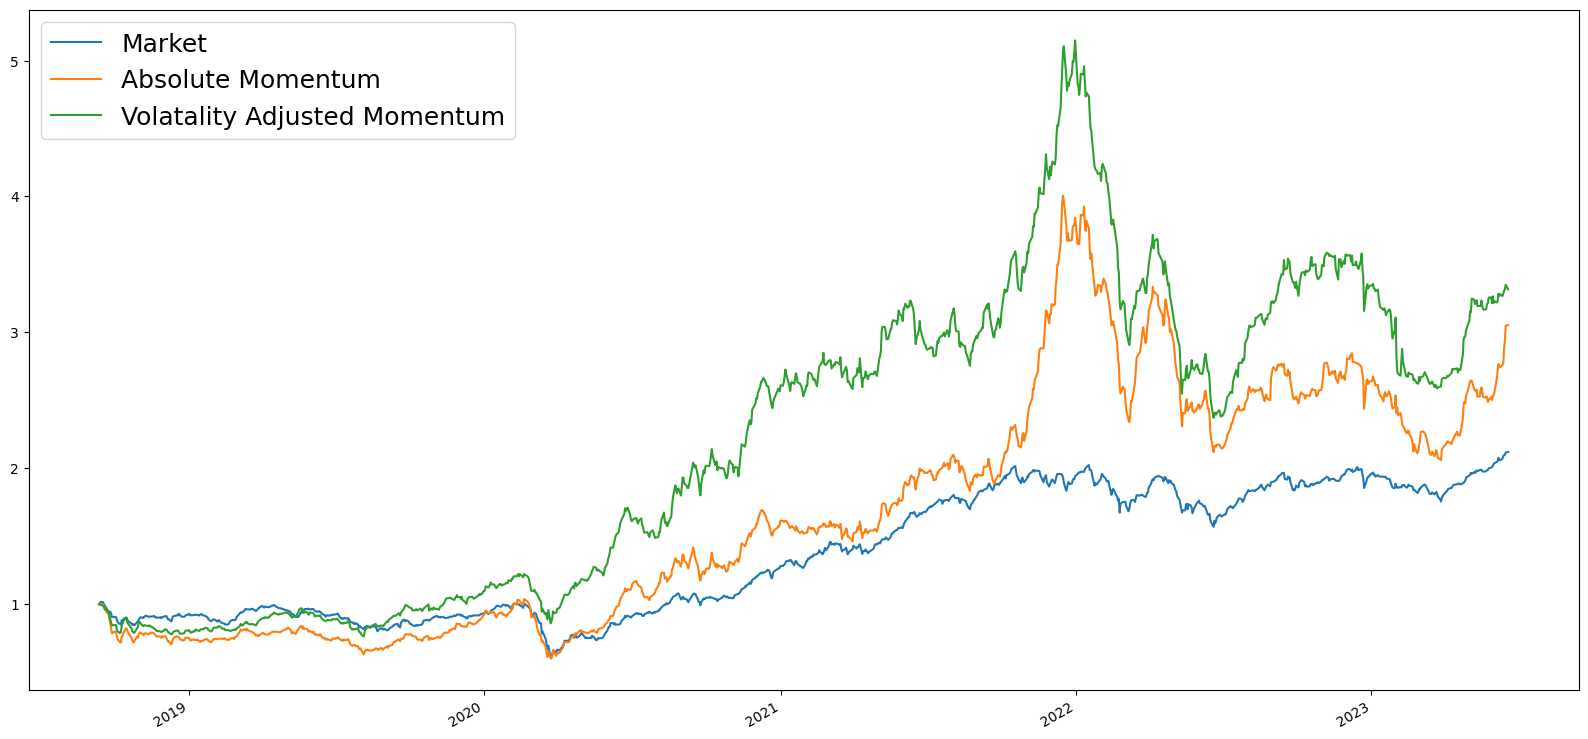

In [1925]:


# Assuming you have a DataFrame named Final_df with 'Market' and 'Absolute Momentum' columns
# Replace this line with your actual data
data = np.cumprod(1 + Final_df)

# Create the plot
data.plot()

# Set the labels

# Create the legend and adjust the font size
plt.legend(fontsize=18)  # Adjust the font size of the legend text

# Show the plot
plt.show()


In [1773]:
Final_df

,Market,Absolute Momentum,Volatality Adjusted Momentum
2018-09-12,0.000000,-0.001100,-0.001100
2018-09-14,0.015749,0.001462,-0.012864
2018-09-17,-0.001664,-0.017613,-0.001650
2018-09-18,-0.015773,-0.003146,-0.012558
2018-09-19,-0.007102,-0.009381,-0.024264
...,...,...,...
2023-09-04,0.010378,0.012321,0.012321
2023-09-05,0.007015,0.001073,0.001073
2023-09-06,0.002214,-0.003321,-0.003321
2023-09-07,0.006007,0.095435,0.095435


In [1776]:
Drawdown(CummulativeReturns)

Market                         -0.399678
Absolute Momentum              -0.881603
Volatality Adjusted Momentum   -0.906074
dtype: float64

In [1777]:
CummulativeReturns

,Market,Absolute Momentum,Volatality Adjusted Momentum
2018-09-12,1.000000,0.998900,0.998900
2018-09-14,1.015749,1.000360,0.986050
2018-09-17,1.014059,0.982741,0.984423
2018-09-18,0.998064,0.979649,0.972061
2018-09-19,0.990976,0.970458,0.948475
...,...,...,...
2023-09-04,2.360115,1.159032,3.851631
2023-09-05,2.376671,1.160276,3.855764
2023-09-06,2.381933,1.156423,3.842961
2023-09-07,2.396241,1.266787,4.209716


In [1926]:
CalculatedSeries=CummulativeReturns
CalculatedSeries=CalculatedSeries.dropna()
CalculatedSeries.index = pd.to_datetime(CalculatedSeries.index)
monthly_returns = CalculatedSeries.resample('M').last().pct_change()
monthly_returns=pd.DataFrame(monthly_returns,columns=['Volatality Adjusted Momentum'])
monthly_returns.index = pd.to_datetime(monthly_returns.index)

returns_matrix = {}

for index, row in monthly_returns.iterrows():
    year = index.year
    month = index.strftime('%B')  # Get the full month name
    
    if year not in returns_matrix:
        returns_matrix[year] = {}
    
    returns_matrix[year][month] = row[0] 

returns_json = json.dumps(returns_matrix, indent=4)
returns_data = json.loads(returns_json)

In [1927]:
returns_data

{'2018': {'September': nan,
  'October': 0.02435937027362778,
  'November': -0.07397659618943675,
  'December': 0.008088636736089727},
 '2019': {'January': 0.018296205436226565,
  'February': -0.010567644690228084,
  'March': 0.07796799849289227,
  'April': 0.07248857805983677,
  'May': -0.00017789368621667911,
  'June': -0.05171733186703398,
  'July': -0.11007470272565212,
  'August': 0.06813215929116723,
  'September': 0.15669880738308017,
  'October': -0.005471626426756915,
  'November': 0.08157758873603749,
  'December': 0.042426565391388005},
 '2020': {'January': 0.07190324291269912,
  'February': -0.06593469365498605,
  'March': -0.12030614295790498,
  'April': 0.22728335491940332,
  'May': 0.06872140539870597,
  'June': 0.2838137594543151,
  'July': -0.08469608260482087,
  'August': 0.20841297446988016,
  'September': 0.11557346859050432,
  'October': 0.02511573052426974,
  'November': 0.181746024753922,
  'December': 0.055038781236969925},
 '2021': {'January': -0.01432418786155

In [1928]:
returns_data = json.loads(returns_json)

# Define the range of years you want (2016 to 2020)
start_year = "2016"
end_year = "2023"

# Extract data for the specified range of years
selected_data = {
    year: returns_data[year]
    for year in returns_data
    if start_year <= year <= end_year
}

# Create a JSON-style string for the selected data
selected_data_json = json.dumps(selected_data, indent=4)

# Print the selected data in JSON-style format
print(selected_data_json)

{
    "2018": {
        "September": NaN,
        "October": 0.02435937027362778,
        "November": -0.07397659618943675,
        "December": 0.008088636736089727
    },
    "2019": {
        "January": 0.018296205436226565,
        "February": -0.010567644690228084,
        "March": 0.07796799849289227,
        "April": 0.07248857805983677,
        "May": -0.00017789368621667911,
        "June": -0.05171733186703398,
        "July": -0.11007470272565212,
        "August": 0.06813215929116723,
        "September": 0.15669880738308017,
        "October": -0.005471626426756915,
        "November": 0.08157758873603749,
        "December": 0.042426565391388005
    },
    "2020": {
        "January": 0.07190324291269912,
        "February": -0.06593469365498605,
        "March": -0.12030614295790498,
        "April": 0.22728335491940332,
        "May": 0.06872140539870597,
        "June": 0.2838137594543151,
        "July": -0.08469608260482087,
        "August": 0.20841297446988016,
    

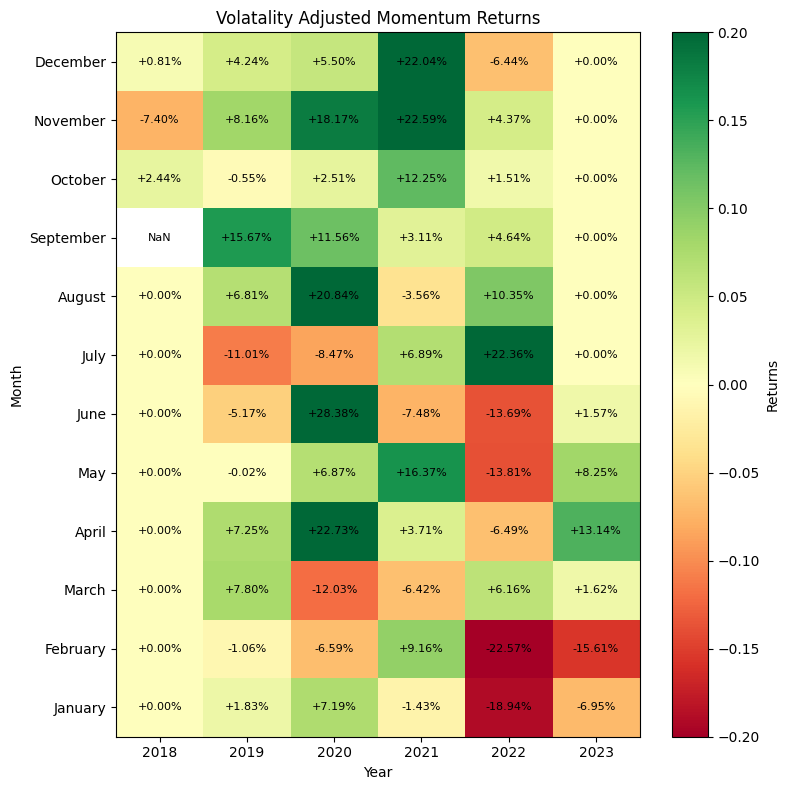

In [1931]:
plot_returns_matrix(selected_data)

In [1665]:
(CummulativeReturns.iloc[-1]-(CummulativeReturns.iloc[-1][0]-1))/CummulativeReturns.std()

Market                          2.311503
Absolute Momentum               2.049395
Volatality Adjusted Momentum    1.921479
dtype: float64

In [1666]:
CummulativeReturns['Market']=CummulativeReturns['Absolute Momentum']-CummulativeReturns['Market']

In [1636]:
CAGR(np.cumprod(1+Final_df))

Market                          0.111617
Absolute Momentum               0.113702
Volatality Adjusted Momentum    0.132859
Name: 2023-06-23 00:00:00, dtype: float64

In [1637]:
Drawdown(np.cumprod(1+Final_df))

Market                         -0.420769
Absolute Momentum              -0.468865
Volatality Adjusted Momentum   -0.408779
dtype: float64

In [1751]:
Drawdown(CummulativeReturns)

Market                         -0.399678
Absolute Momentum              -0.503627
Volatality Adjusted Momentum   -0.364331
dtype: float64